## Stacked and Line Plots

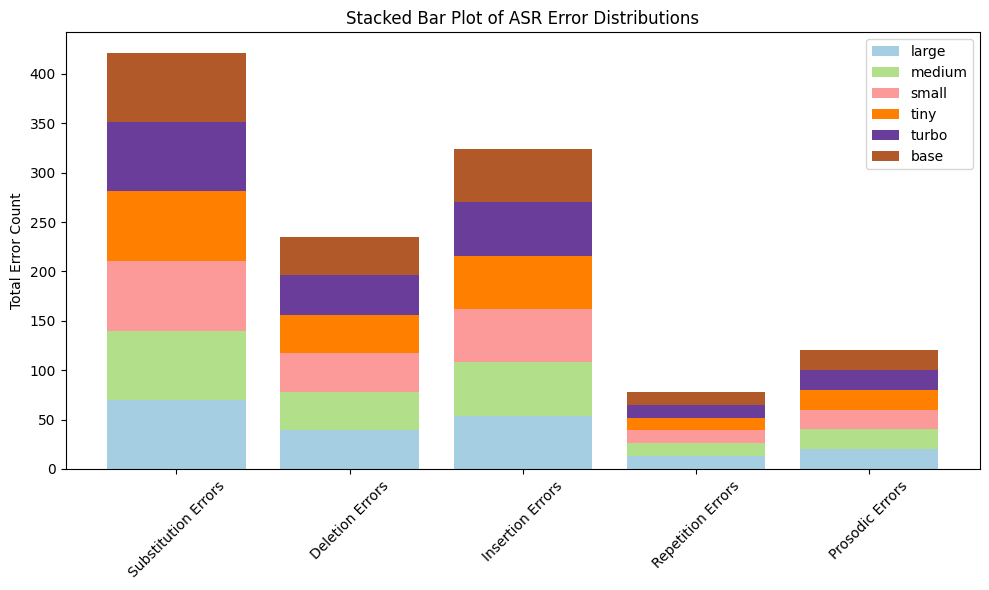

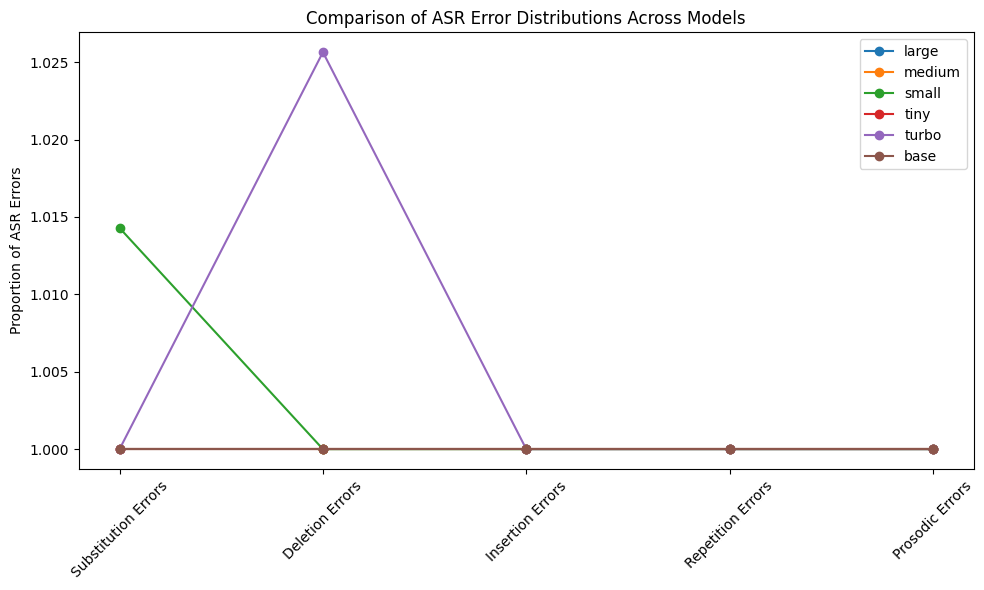

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
data_files = {
    "large": "classification/large_Summary.xlsx - large.csv",
    "medium": "classification/medium_Summary.xlsx - medium.csv",
    "small": "classification/small_Summary.xlsx - small.csv",
    "tiny": "classification/tiny_Summary.xlsx - tiny.csv",
    "turbo": "classification/turbo_Summary.xlsx - turbo.csv",
    "base": "classification/base_Summary.xlsx - base.csv"
}

# Load data
data = {}
for key, file in data_files.items():
    data[key] = pd.read_csv(file, index_col=0)

# Extract therapist error classes and ASR-recognized error types
error_classes = data["large"].index.tolist()
asr_classes = [col for col in data["large"].columns if col != "Total Count"]

# --- Stacked Bar Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(error_classes))
colors = plt.cm.Paired(np.linspace(0, 1, len(data)))

for i, (model, df) in enumerate(data.items()):
    values = df[asr_classes].sum(axis=1).values  # Sum across ASR error types
    ax.bar(error_classes, values, label=model, bottom=bottom, color=colors[i])
    bottom += values

ax.set_ylabel("Total Error Count")
ax.set_title("Stacked Bar Plot of ASR Error Distributions")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Line Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

for model, df in data.items():
    proportions = df[asr_classes].sum(axis=1) / df["Total Count"]
    ax.plot(error_classes, proportions, marker='o', label=model)

ax.set_ylabel("Proportion of ASR Errors")
ax.set_title("Comparison of ASR Error Distributions Across Models")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Heat Maps of Confusion Matrix - with values

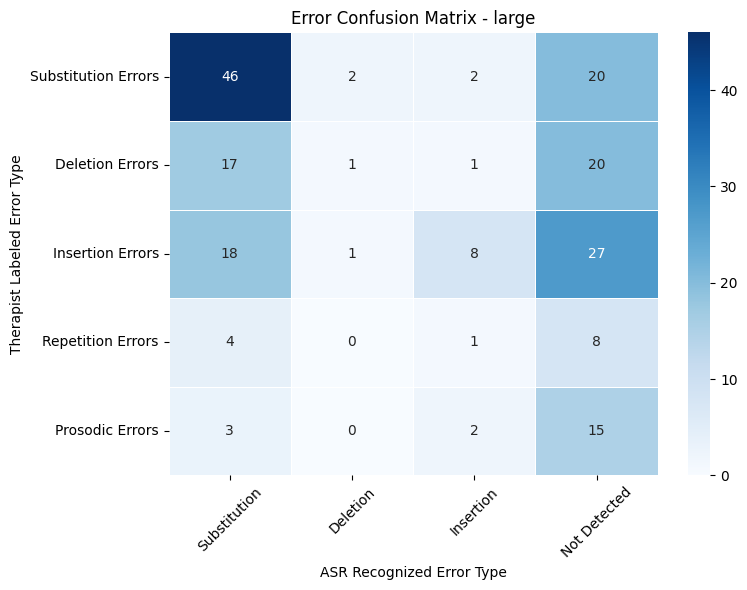

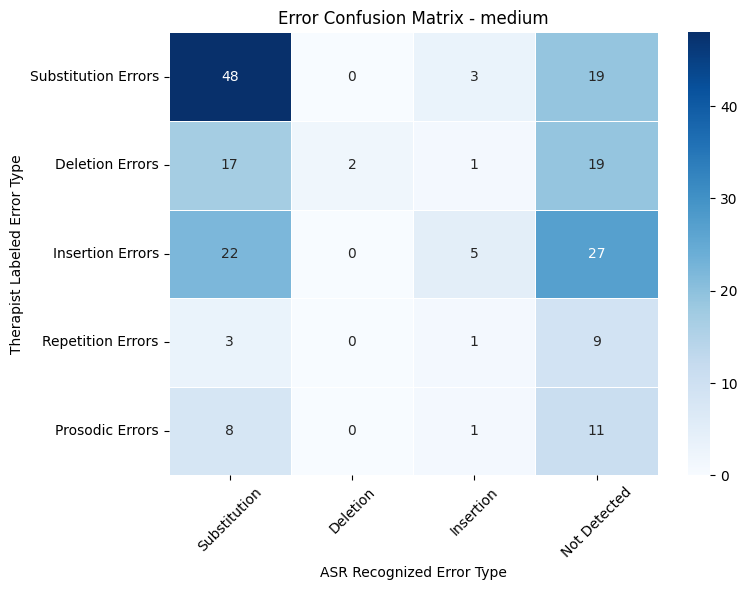

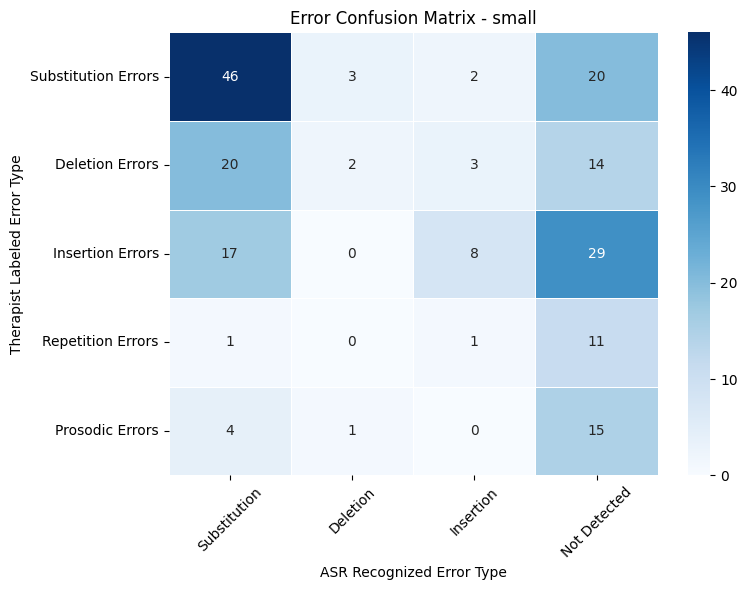

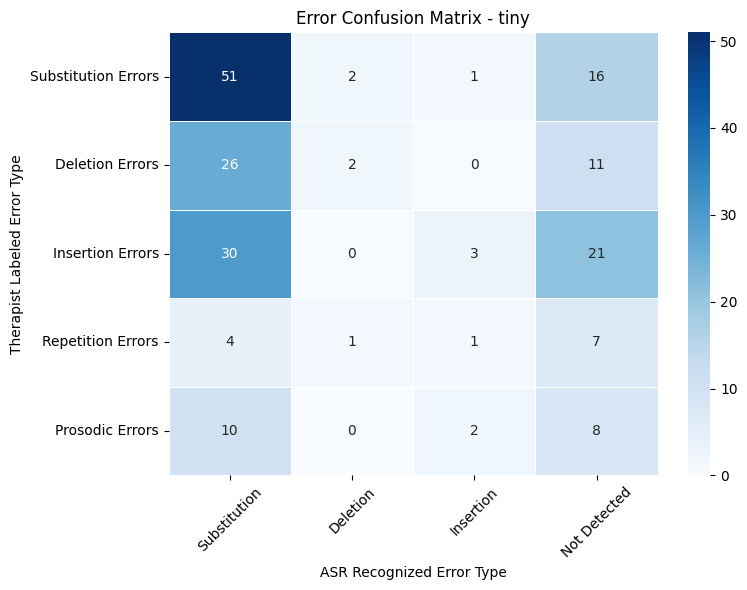

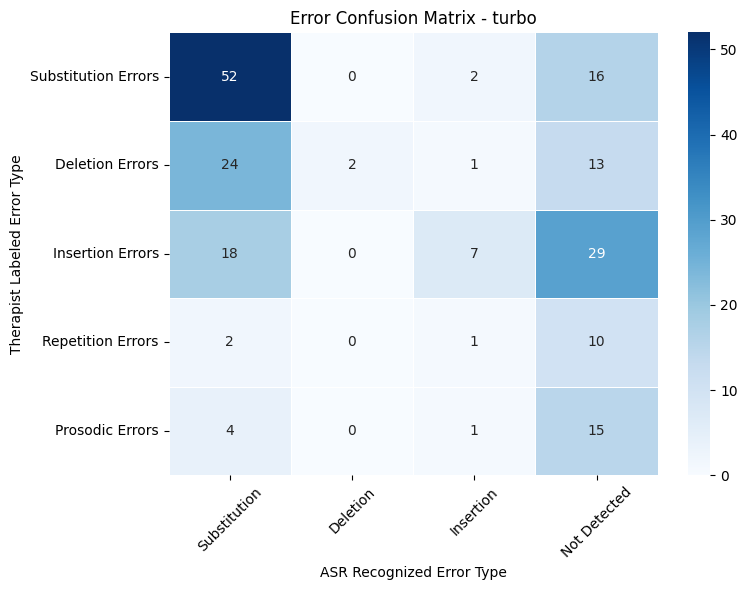

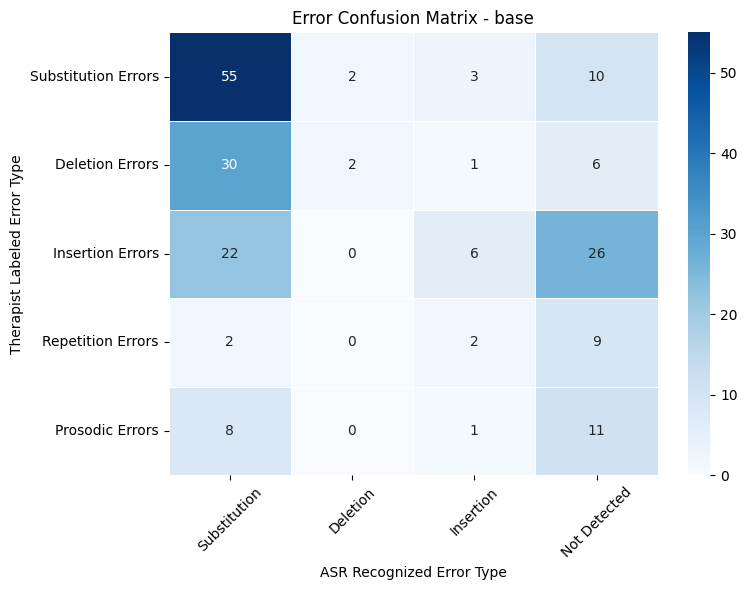

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# File paths
data_files = {
    "large": "classification/large_Summary.xlsx - large.csv",
    "medium": "classification/medium_Summary.xlsx - medium.csv",
    "small": "classification/small_Summary.xlsx - small.csv",
    "tiny": "classification/tiny_Summary.xlsx - tiny.csv",
    "turbo": "classification/turbo_Summary.xlsx - turbo.csv",
    "base": "classification/base_Summary.xlsx - base.csv"
}

# Load data
data = {}
for key, file in data_files.items():
    data[key] = pd.read_csv(file, index_col=0)

# Extract therapist error classes and ASR-recognized error types
error_classes = data["large"].index.tolist()
asr_classes = [col for col in data["large"].columns if col != "Total Count"]

# --- Heatmaps ---
for model, df in data.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[asr_classes], annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.title(f"Error Confusion Matrix - {model}")
    plt.xlabel("ASR Recognized Error Type")
    plt.ylabel("Therapist Labeled Error Type")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Heat Maps of Confusion Matrices with Percentages

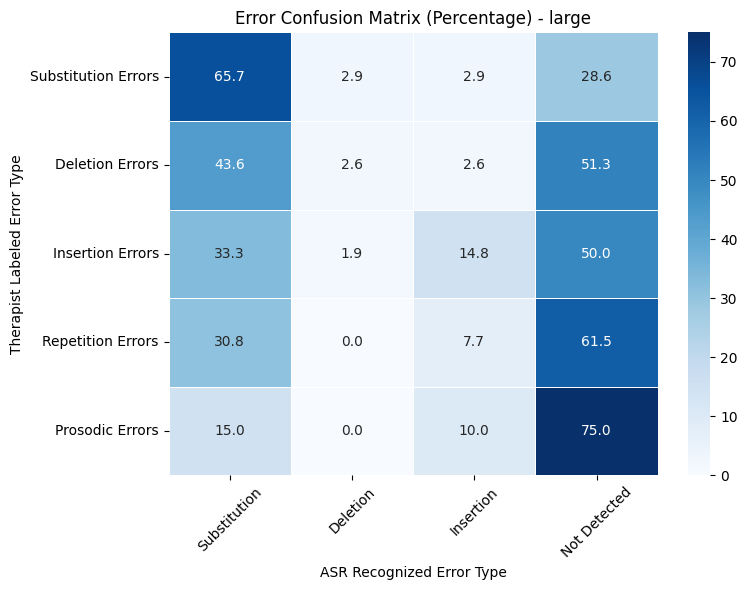

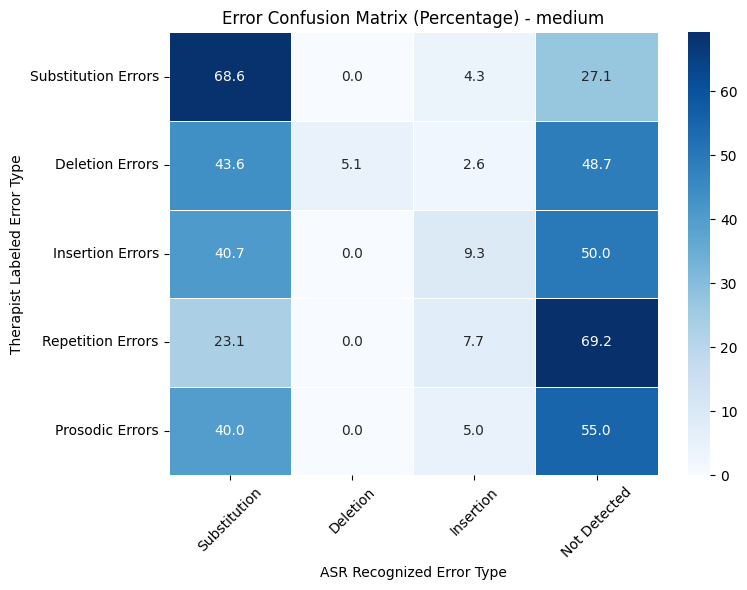

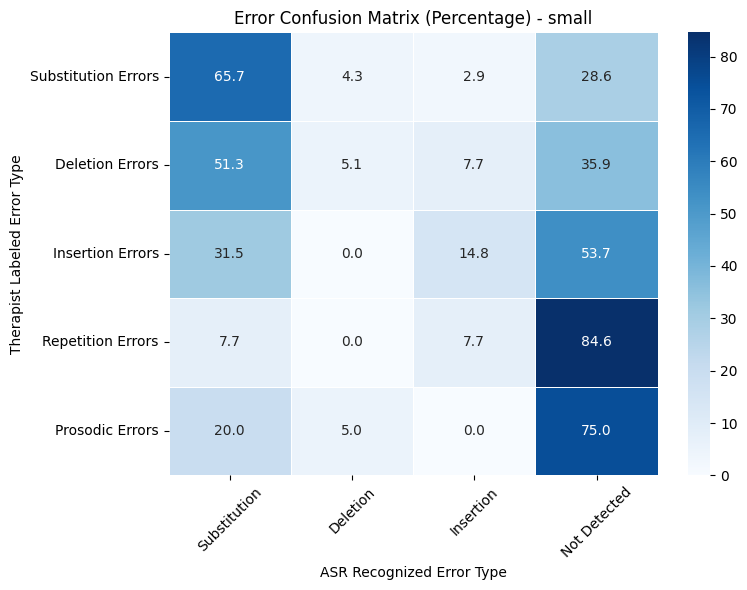

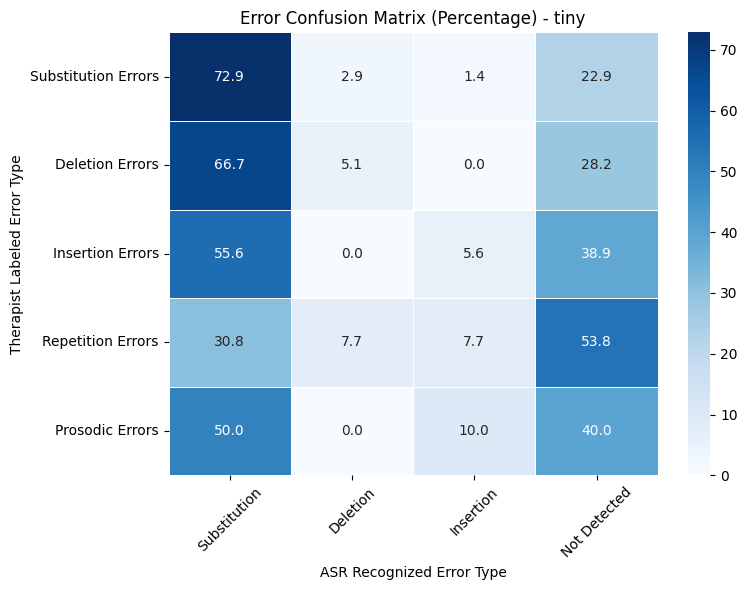

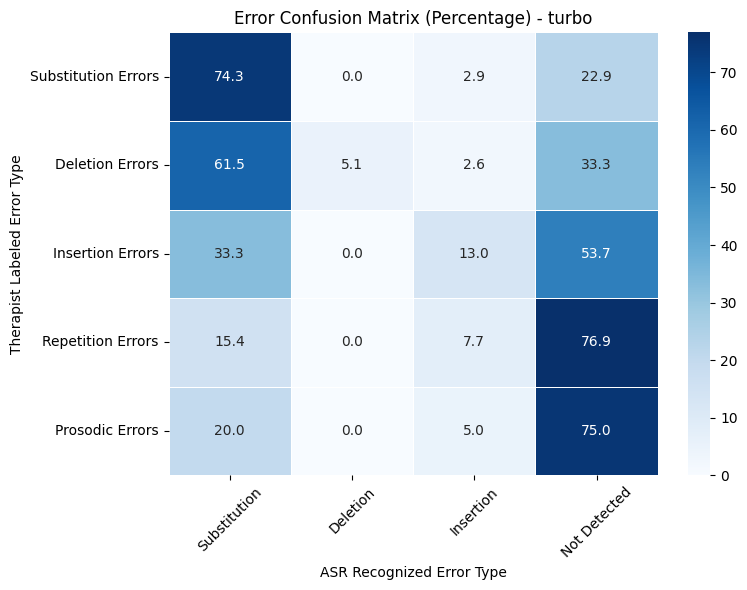

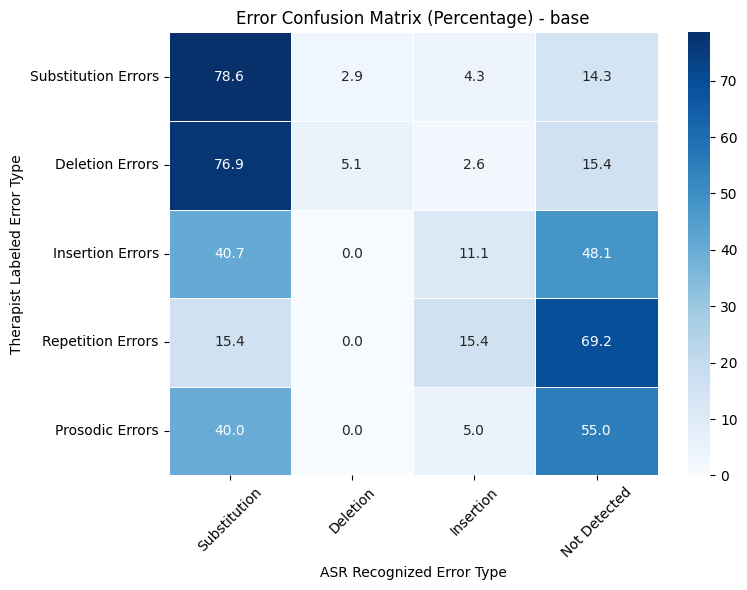

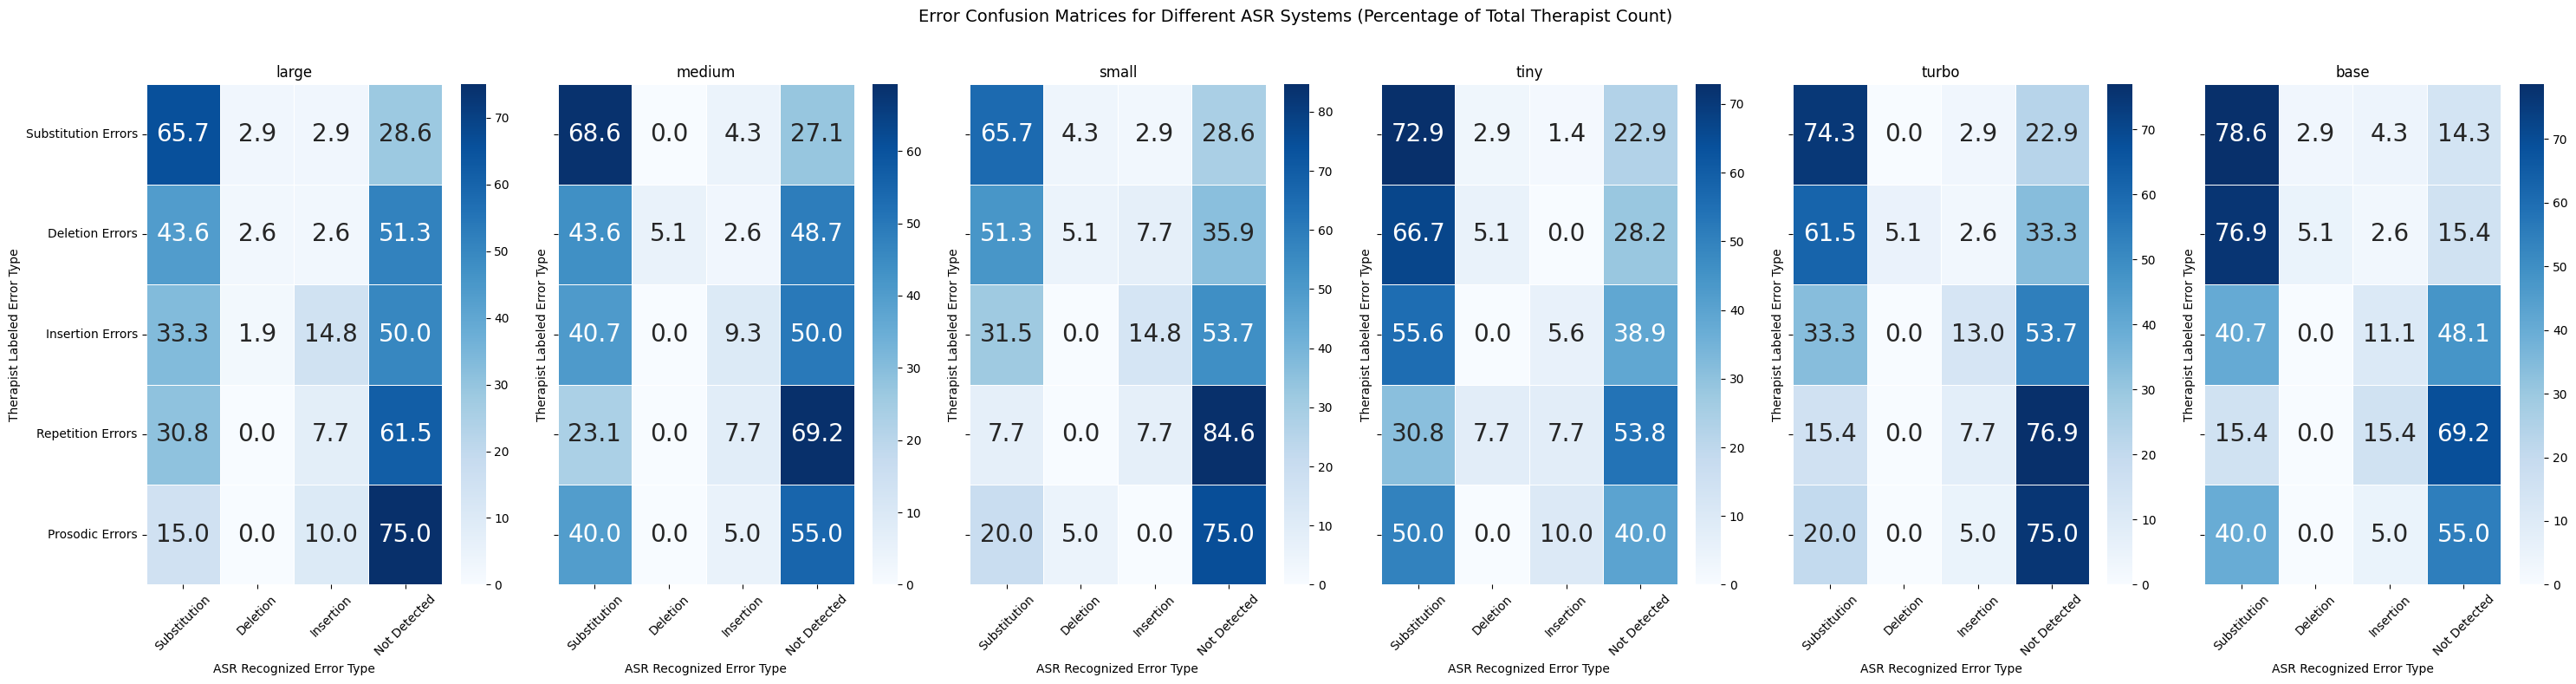

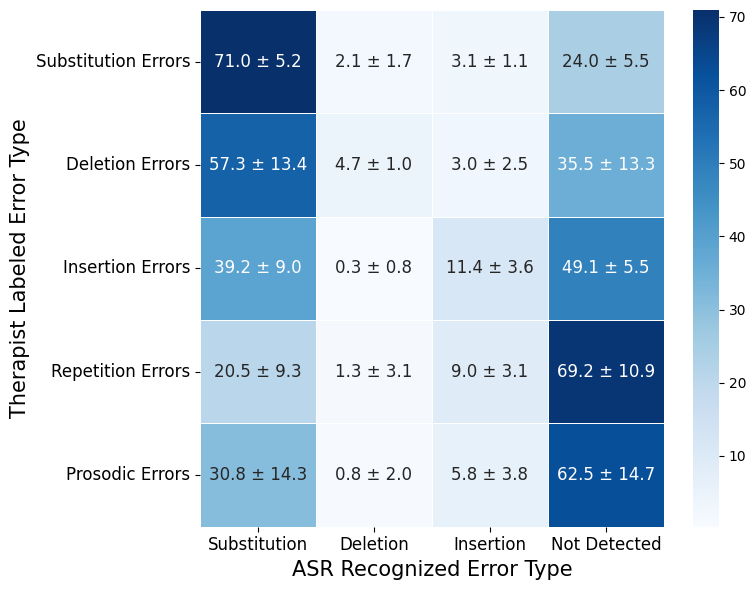

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# File paths
data_files = {
    "large": "classification/large_Summary.xlsx - large.csv",
    "medium": "classification/medium_Summary.xlsx - medium.csv",
    "small": "classification/small_Summary.xlsx - small.csv",
    "tiny": "classification/tiny_Summary.xlsx - tiny.csv",
    "turbo": "classification/turbo_Summary.xlsx - turbo.csv",
    "base": "classification/base_Summary.xlsx - base.csv"
}

# Load data
data = {}
for key, file in data_files.items():
    data[key] = pd.read_csv(file, index_col=0)

# Extract therapist error classes and ASR-recognized error types
error_classes = data["large"].index.tolist()
asr_classes = [col for col in data["large"].columns if col != "Total Count"]


# --- Heatmaps (Percentage of Total Therapist Count) ---
for model, df in data.items():
    percentage_df = df[asr_classes].div(df["Total Count"], axis=0) * 100
    plt.figure(figsize=(8, 6))
    # print(percentage_df)
    sns.heatmap(percentage_df, annot=percentage_df, fmt=".1f", cmap="Blues", linewidths=0.5, annot_kws={"size": 10})
    plt.title(f"Error Confusion Matrix (Percentage) - {model}")
    plt.xlabel("ASR Recognized Error Type")
    plt.ylabel("Therapist Labeled Error Type")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- Single Figure with Multiple Heatmaps ---
n_models = len(data)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 8), sharex=True, sharey=True)

vmin, vmax = min(df[asr_classes].div(df["Total Count"], axis=0).min().min() for df in data.values()), max(df[asr_classes].div(df["Total Count"], axis=0).max().max() for df in data.values())

for ax, (model, df) in zip(axes, data.items()):
    percentage_df = df[asr_classes].div(df["Total Count"], axis=0) * 100
    sns.heatmap(percentage_df, annot=percentage_df.round(1), fmt=".1f", cmap="Blues", linewidths=0.5, annot_kws={"size": 20}, ax=ax)#, vmin=vmin, vmax=vmax)
    ax.set_title(model)
    ax.set_xlabel("ASR Recognized Error Type",)
    ax.set_ylabel("Therapist Labeled Error Type")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.suptitle("Error Confusion Matrices for Different ASR Systems (Percentage of Total Therapist Count)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###################
# Define ASR-recognized error types
asr_classes = [col for col in next(iter(data.values())).columns if col != "Total Count"]

# Define the explicit order
ordered_models = ["tiny", "base", "small", "medium", "large", "turbo"]

# --- Single Figure with Multiple Heatmaps ---
n_models = len(ordered_models)


####################################################
# Define fixed order for therapist error types
error_order = ["Substitution Errors", "Deletion Errors", "Insertion Errors", "Repetition Errors", "Prosodic Errors"]


# Compute mean and standard deviation across ASRs
percentage_matrices = [df[asr_classes].div(df["Total Count"], axis=0) * 100 for df in data.values()]
mean_percentage = pd.concat(percentage_matrices).groupby(level=0).mean()
std_percentage = pd.concat(percentage_matrices).groupby(level=0).std()

# Reorder rows according to the defined order
mean_percentage = mean_percentage.loc[error_order]
std_percentage = std_percentage.loc[error_order]

# Format annotations as mean ± std
annotations = mean_percentage.round(1).astype(str) + " ± " + std_percentage.round(1).astype(str)
# --- Single Heatmap with Mean ± Std ---
plt.figure(figsize=(8, 6))
sns.heatmap(mean_percentage, annot=annotations, fmt="", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
# plt.title("Mean Error Confusion Matrix Across ASRs (Percentage of Total Therapist Count)")
plt.xlabel("ASR Recognized Error Type",fontsize=15)
plt.ylabel("Therapist Labeled Error Type",fontsize=15)
plt.xticks(rotation=0, ha="center",fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.show()
